<a href="https://colab.research.google.com/github/Malvtrics/ML/blob/master/EE430_Mini_Project_Cheng_Sihua_A0177699Y.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

In this project we will implement a neural network (NN) architecture from scratch. Building the neural network will give a hands-on experience converting mathematical foundations of NN such as feed-forward and backpropagation algorithms into Python code. The project will also include implementation of sub-functions in NN such as loss functions, activation functions, and derivatives.

The model implemented will be tested on following examples:

#### Classification:

1. AND/OR Logic
2. XOR Logic

#### Regression:

1. Sinusoidal curve
2. Gaussian curve

The model will be evaluated on real world data using the Wisconsin Breast Cancer Dataset. 





### Problem Description

You are provided with a base Class for implementation of a simple Neural Network. You will also be provided with templates for some of the helper functions. You are required to implement functions in the Neural Network Class. You are also required to test your neural network with various datasets and show the effect of modifying parameters. Below is a list of problems that you are expected to solve in this Project:

1. Complete the implementation of Feedforward and Backpropagation
2. Implement functions for train, predict, and evaluate
3. Generate datasets for AND, XOR logics and Sinusoidal, Gaussian functions
4. Test your model using the above datasets. What are you choice of model parameters and how does it affect the performance?
5. Implement functions to improve model performance. What are your observations
6. Evaluate model performance on Wisconsin Breast Cancer dataset. What is the highest accuracy score obtained?

### Notes

1. Only following Python libraries (and their functions) are allowed: **numpy, pandas, matplotlib, seaborn.** (The code provided include the use of sklearn library for loading data, evaluation, and TSNE encoding. Do not load any other functions from sklearn.)
2. Following libraries from Python may not be used: **Keras, TensorFlow, pytorch, thean, scikit-learn (except functions that are already included)**
3. You may refer to online resources but do not copy+paste. All submitted items will be checked for Plagiarism.
4. The base class provided is for your reference. You are welcome to implement the NN algorithm differently. In that case, ensure that your implementation covers all the sub-problems. Also explain your methodology.

### Import Libraries

* numpy, pandas - Data handling and processing
* matplotlib, seaborn - Visualization
* tqdm - For implementing progressbars
* sklearn - datasets: to load breast cancer dataset, TSNE: for visualization


In [0]:
# Imports
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import random
np.random.seed(2020)

In [0]:
print(np.random.random(10))
print(np.random.random(10))

[0.98627683 0.87339195 0.50974552 0.27183571 0.33691873 0.21695427
 0.27647714 0.34331559 0.86215894 0.15669967]
[0.14088724 0.75708028 0.73632492 0.35566309 0.34109302 0.66680305
 0.21710064 0.56142698 0.12417878 0.31973648]


In [0]:
print(np.random.RandomState(seed=30).random(10))
print(np.random.RandomState(seed=20).random(10))

[0.64414354 0.38074849 0.66304791 0.16365073 0.96260781 0.34666184
 0.99175099 0.2350579  0.58569427 0.4066901 ]
[0.5881308  0.89771373 0.89153073 0.81583748 0.03588959 0.69175758
 0.37868094 0.51851095 0.65795147 0.19385022]


In [0]:
print(np.random.RandomState(20).random(10))

[0.5881308  0.89771373 0.89153073 0.81583748 0.03588959 0.69175758
 0.37868094 0.51851095 0.65795147 0.19385022]


### Phase 1: Implement and test a baseline Neural Network

#### 1.1 Activation functions and derivatives

In the below cell we define sigmoid activation function and its derivative

In [0]:
# Activation function
def sigmoid(t):
    return 1/(1+np.exp(-t))

# Derivative of sigmoid
def sigmoid_derivative(p):
    return p * (1 - p)

# Activation function
# def relu(t):
#     return 

# Derivative of relu
# def relu_derivative(p):
#     return 

#### 1.2 Loss functions and derivatives

In the below cell we define rmse loss function and its derivative

In [0]:
def rmse(y, ypred):
    return np.sqrt(np.mean((y - ypred)**2))

# Loss function derivative - RMSE
def rmse_derivative(y, ypred):
    return 2*(y - ypred)


#### 1.3 Base Class

Below is the base class implementation for Neural Network. Please add code whereever it reads **Write your code here**

In [0]:
# Class definition
class NeuralNetwork:
    def __init__(self, x, y, hidden_nodes, learning_rate):
        """
        Class initializer. Loads the value of input data and initializes weights

        Parameters:
        x: input data
        y: ground truth label

        Sets class parameters:
        self.x = input data
        self.y = ground truth label
        self.ypred = initialize prediction variable with zeros as the same shape as ground truth

        self.weights = weights for each layer
        self.bias = bias for each layer

        self.hidden_nodes = number of nodes in the hidden layer
        """

        self.x = x
        self.y = y
        self.ypred = np.zeros(y.shape)

        self.hidden_nodes = hidden_nodes
        
        self.weights1 = np.random.rand(self.x.shape[1], self.hidden_nodes)
        self.weights2 = np.random.rand(self.hidden_nodes, 1)

        self.bias1 = np.random.rand(self.hidden_nodes)
        self.bias2 = np.random.rand(1)

        self.lr = learning_rate
        
        
    def feedforward(self):
        """
        Perform feedforward operation: input -> layer1 -> layer2
        
        HINT:
        layer1 = activation(weight1<dot>x + bias1)
        layer2 = activation(weight2<dot>x + bias2)

        For example: self.layer1 = sigmoid(np.dot(self.x, self.weights1) + self.bias1)

        Parameters:
        x: input data
        y: ground truth label

        Return:
        self.layer2: The output from layer2
        """

        # Write your code here
        self.layer1 = sigmoid(np.dot(self.x, self.weights1) + self.bias1)
        self.layer2 = sigmoid(np.dot(self.layer1, self.weights2) + self.bias2)
        #self.layer1 = sigmoid(np.dot(self.x, self.weights1))
        #self.layer2 = sigmoid(np.dot(self.layer1, self.weights2))
        return self.layer2
        
    def backprop(self):
        """
        Perform backpropagation to update weights and bias: loss -> layer2 -> layer1
        
        HINT:
        d_loss = derivative of loss (example rmse_derivative)
        d_weights2 = layer1_out <dot> d_loss*d_activation
        d_bias2 = I <dot> d_loss*d_activation

        repeat for d_weights1 and d_bias1

        Update weights and bias based on the error and learning rate

        Updates:
        Model weights and biases
        """
        d_loss = rmse_derivative(self.y,self.ypred)
        # print("d_loss is {}".format(d_loss))
        # Write your code here
        # compute gradients
        delta = d_loss * sigmoid_derivative(self.ypred)  # (4,1)m(4,1)=(4,1)
        #print("delta is {},shape is {}".format(delta,delta.shape))
        d_weights2 = np.dot(self.layer1.T, delta)  # (3,4)d(4,1)=(3,1)
        #print("d_weights2 is {},shape is {}".format(d_weights2,d_weights2.shape))
        #print(np.ones(1,self.x.shape[0]).shape)
        #print(delta.shape)
        d_bias2 = np.mean(np.dot(np.ones((1,self.x.shape[0])), delta)) # (1,4)d(4,1)=(1,1)=>(1,)
        #print("d_bias2 is {}".format(d_bias2))

        delta = self.weights2.T*sigmoid_derivative(self.layer1)*delta #(1,3)m(4,3)m(4,1)=(4,3)
        d_weights1 = np.dot(self.x.T, delta)  #(2,4)d(4,3)=(2,3)
        d_bias1 = np.mean(delta,0)  #(1,4)d(4,3)=(1,3)=>(3,)
        #print("d_bias1 is {}".format(d_bias1))

        # update parameters
        self.weights1 += self.lr * d_weights1
        self.weights2 += self.lr * d_weights2

        self.bias1 += self.lr * d_bias1
        self.bias2 += self.lr * d_bias2

    def train(self, x, y):
        """
        Train the model based on training data passed as input
        
        HINT:
        Training involves two steps:
        output <- feedforward
        update_weights <- backpropagate

        Parameters:
        x: input data
        y: ground truth label

        Return: NONE

        Updates: prediction self.ypred
        """
        self.x = x
        self.y = y

        # Write your code here
        # predict

        #print("----forward start----")
        self.ypred = self.feedforward()
        #print("----forward end----")
        #print("----backprop start---")
        # backpropagate
        self.backprop()
        #print("----backprop end---")
    
    def predict(self, x):
        """
        Predict the outcome for the given input using current model
        
        HINT:
        For prediction output is obtained by performing feedforward

        Parameters:
        x: input data

        Return: output prediction using the model (self.ypred)
        """
        self.x = x

        # Write your code here

        self.ypred = self.feedforward()
        return self.ypred

    def evaluate(self, y, ypred):
        """
        Compute the error for given ground truth and prediction obtained
        
        HINT:
        Training involves two steps:
        output <- feedforward
        update_weights <- backpropagate

        Parameters:
        y: ground truth
        ypred: output prediction

        Return: prediction error self.loss
        """
        self.y = y
        self.ypred = ypred

        # write your code here
        self.loss = rmse(self.y, self.ypred)
        return self.loss

#### 1.4 Backpropagation Algorithm

<img src="https://miro.medium.com/max/1742/1*FceBJSJ7j8jHjb4TmLV0Ew.png" width="600" />

Based on your code (The base NN class, activation, and loss functions) please explain how backpropagation works. Consider to explain the original algorithm and your code flow. Feel free to use mathematical equations, images, code outputs for your explanation.

You may consider the following reference:

1.   [BP Algorithm Implementation](http://www.adeveloperdiary.com/data-science/machine-learning/understand-and-implement-the-backpropagation-algorithm-from-scratch-in-python/)
2.   [How BP Algorithm works](http://neuralnetworksanddeeplearning.com/chap2.html)



##### 1.4.1 How it works

According to the picture above, when  calculate the weight contribution to the final loss,  will calculate the derivatives chain. 

1. The first derivative  calculate is the derivative of the loss function, in my code , it is :

```
d_loss = rmse_derivative(self.y,self.ypred)
```

+ the shape for it is (4,1) taking our XOR example

2. Then need to calculate the derivative of the activation functions, in my code, it is:

```
delta = d_loss * sigmoid_derivative(self.ypred)
```

+ this delta means error contributions in each layer and the shape is (4,1)

3. Then step is to calculte the derivative of ypred to the weight of layer we concerned, this can be easily got by the output of the previous layer , so here the d_weights use the value of self.layer1 

```
d_weights2 = np.dot(self.layer1.T, delta)  
```
+ same to the bias but normally  don't care of it much

```
d_bias2 = np.mean(np.dot(np.ones((1,self.x.shape[0])), delta)) 
```

+ when it comes to weight1 ,things become interested, not only need to calculate the derivative of activations in layer1 , but also need to use delta value from layer2 due to the derivative chain 

```
delta = self.weights2.T * sigmoid_derivative(self.layer1) * delta 
```

  + this means the loss delta in each layer eg:layer L depends on layer L+1
  + so can get the following:

```
d_weights1 = np.dot(self.x.T, delta) 
d_bias1 = np.mean(delta,0)
```

4. Fianlly  need to update the parameters layer by layer
```
self.weights1 += self.lr * d_weights1
self.weights2 += self.lr * d_weights2
self.bias1 += self.lr * d_bias1
self.bias2 += self.lr * d_bias2
```

#### 1.5: Classification Test

Setup data for AND logic and XOR logic. Train the model and observe if the model is able to correctly classify

For AND Logic:

| x | x | y |
|---|---|---|
| 0 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

For XOR Logic:

| x | x | y |
|---|---|---|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |




##### 1.5.1 Initialization

In [0]:
# Each row is a training example, each column is a feature
x = np.array(([0, 0], [0,1], [1,0], [1,1]), dtype=float)
y = np.array(([0], [0], [0], [1]), dtype=float)

#x = np.array(([0, 0], [0,1], [1,0], [1,1]), dtype=float)
#y = np.array(([0], [1], [1], [0]), dtype=float)

hidden_nodes = 8
learning_rate = 0.01

NN = NeuralNetwork(x, y, hidden_nodes, learning_rate)
# print ("Input : \n" + str(x))
# print ("Actual Output: \n" + str(y))

##### 1.5.2 Train model

In [0]:
loss = []
epochs = 80000

#tqdm generates a progress bar
for i in tqdm(range(epochs)):
  loss.append(NN.evaluate(NN.y, NN.ypred))
  # if i<100:
  #   print('epoch {} , losss {}'.format(i,loss[i]))
  NN.train(x, y)

##### 1.5.3 Loss trend over epochs

Observing the loss trend helps choose model parameters. For example, if the loss is continuing to decrease, the number of epochs may need to be increased. Choice of learning rate may affect the loss trend

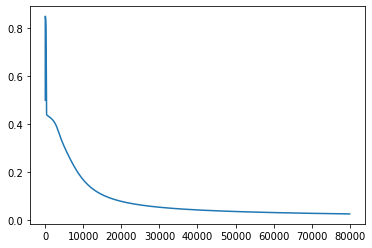

In [0]:
plt.plot(loss)

M**y comments** : Seems the loss decrease much at first and then become smooth at a second stage, have changed the params like learning rate but seems still have sharp edges

##### 1.5.4 Print weights and biases

In [0]:
print('weights 1:\n', NN.weights1)
print('weights 2:\n', NN.weights2)

print('bias 1:\n', NN.bias1)
print('bias 2:\n', NN.bias2)

weights 1:
 [[ 2.51874322  0.45448771 -2.26841522  1.00203832 -0.27881422  1.23676089
   0.0808957   0.71511092]
 [ 0.15696081  0.94063312 -2.65753642  0.87424345 -0.44543894  0.61269151
   1.3673065   1.64069002]]
weights 2:
 [[ 3.09404711]
 [ 0.78390669]
 [-9.00287606]
 [ 1.43831798]
 [-0.90108658]
 [ 1.51067569]
 [ 0.85295806]
 [ 2.84932422]]
bias 1:
 [-0.75204851  0.0184592   3.25003829  0.01104158  0.25304881 -0.06607127
  0.32659631 -0.7595213 ]
bias 2:
 [-3.86301722]


##### 1.5.5 Observe Decision Boundary

The below code is used to visualize the decision boundary over the region between 0 to 1 for both feature inputs. Do not modify the code below. Ensure your neural network is trained before running the code below

In [0]:
# outcome = []
# for i in np.arange(0,1,0.01):
#   for j in np.arange(0,1,0.01):
#     p = NN.predict(x=[i, j])
#     outcome.append([i, j, p[0]])
  
# outcome = np.array(outcome)

# f = plt.figure(figsize=(5,5))
# plt.scatter(outcome[:,0], outcome[:,1], c=outcome[:,2], cmap="coolwarm")

#### 1.6 Classification: Notes

* Perform from steps **1.5.1 to 1.5.5 for each of AND logic and XOR logic** separately
* You may additional text or code cells to note down the outcomes as appropriate
* Add a text cell to highlight your observations and inference



##### 1.6.1 AND logic

For AND Logic:

| x | x | y |
|---|---|---|
| 0 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

In [0]:
x1 = np.array(([0, 0], [0,1], [1,0], [1,1]), dtype=float)
y1 = np.array(([0], [0], [0], [1]), dtype=float)

In [0]:
hidden_nodes = 4
learning_rate = 0.01
NN1 = NeuralNetwork(x1, y1, hidden_nodes, learning_rate)

In [0]:
loss1 = []
epochs = 80000

#tqdm generates a progress bar
for i in tqdm(range(epochs)):
  loss1.append(NN1.evaluate(NN1.y, NN1.ypred))
  # if i<100:
  #   print('epoch {} , losss {}'.format(i,loss[i]))
  NN1.train(x1, y1)

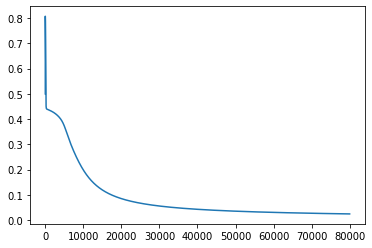

In [0]:
plt.plot(loss1)

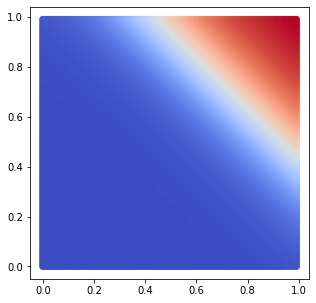

In [0]:
outcome = []
for i in np.arange(0,1,0.01):
  for j in np.arange(0,1,0.01):
    p = NN1.predict(x=[i, j])
    outcome.append([i, j, p[0]])
  
outcome = np.array(outcome)

f = plt.figure(figsize=(5,5))
plt.scatter(outcome[:,0], outcome[:,1], c=outcome[:,2], cmap="coolwarm")

**My comments**: 

+ 80000 epoches with learning rate 0.01 for AND logic , seems the network has already can learn the result and decision boundry is some kind of clear

+ but the loss is a little weird, the drop is not smooth as it always. confused by it is sharp in the very begining and flatten within hundreds of epoches

##### 1.6.2 XOR logic

For XOR Logic:

| x | x | y |
|---|---|---|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

In [0]:
x2 = np.array(([0, 0], [0,1], [1,0], [1,1]), dtype=float)
y2 = np.array(([0], [1], [1], [0]), dtype=float)

In [0]:
hidden_nodes = 8
learning_rate = 0.01
NN2 = NeuralNetwork(x2, y2, hidden_nodes, learning_rate)

In [0]:
loss2 = []
epochs = 80000

#tqdm generates a progress bar
for i in tqdm(range(epochs)):
  loss2.append(NN2.evaluate(NN2.y, NN2.ypred))
  # if i<100:
  #   print('epoch {} , losss {}'.format(i,loss[i]))
  NN2.train(x2, y2)

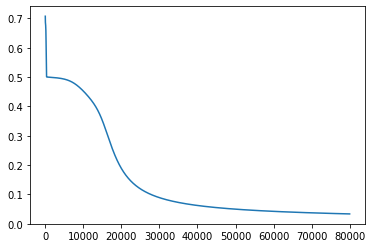

In [0]:
plt.plot(loss2)

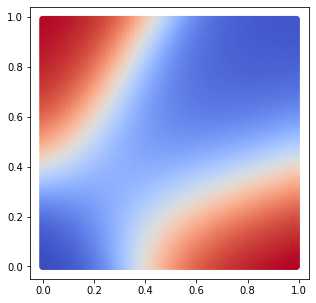

In [0]:
outcome = []
for i in np.arange(0,1,0.01):
  for j in np.arange(0,1,0.01):
    p = NN2.predict(x=[i, j])
    outcome.append([i, j, p[0]])
  
outcome = np.array(outcome)

f = plt.figure(figsize=(5,5))
plt.scatter(outcome[:,0], outcome[:,1], c=outcome[:,2], cmap="coolwarm")

**My comments**: 

+ 80000 epoches with learning rate 0.01 for XOR logic , seems the network has already can get the result, but the decision boundry is not that clear, and when x1 and x2 go to the side (meaning near to 1 and 0), the internet will have a better prediction

+ the center part is not clear which means our model feel difficult to decide when there is a input x vector like (0.5，0.5) what final XOR result will turn to?

#### 1.7: Regression Test

Setup data for a Sinusoidal function and Gaussian function. For example,

```
x = np.arange(-1,1,0.01).reshape(-1,1)
y = np.sin(np.pi*x)
```

HINT: When the output values are negative sigmoid activation at the output may not work. You may need to consider alternatives such as linear or tanh. If you find this difficult to implement you may consider only the positive cycle range for sine.

Also note that when training entire batch of input (for eg. 200 samples) may lead to overflow. You may need to modify the code for sequential learning or mini-batch learning.

Repeat the steps from 1.5.1 to 1.5.4 and record your outcomes. For visualizing the outcome **(do not use 1.5.5)** instead run the following code.

##### 1.7.1: Update activation function

As hint, need to change the activation function to tanh in order to avoid effects from negative sigmoid activation

In [0]:
def tanh(t):
    return (np.exp(t)-np.exp(-t))/(np.exp(t)+np.exp(-t))

# Derivative of tanh
def tanh_derivative(p):
    return (1 - p * p)

##### 1.7.2: Update base class

Since the activation function changed, need to change our base class to use it

In [0]:
# Class definition
class NeuralNetwork:
    def __init__(self, x, y, hidden_nodes, learning_rate):
        self.x = x
        self.y = y
        self.ypred = np.zeros(y.shape)
        self.hidden_nodes = hidden_nodes   
        self.weights1 = np.random.randn(self.x.shape[1], self.hidden_nodes)
        self.weights2 = np.random.randn(self.hidden_nodes, 1)
        self.bias1 = np.random.rand(self.hidden_nodes)
        self.bias2 = np.random.rand(1)
        self.lr = learning_rate
        
        
    def feedforward(self):
        self.layer1 = tanh(np.dot(self.x, self.weights1) + self.bias1)
        self.layer2 = tanh(np.dot(self.layer1, self.weights2) + self.bias2)
        return self.layer2
        
    def backprop(self):  
        d_loss = rmse_derivative(self.y,self.ypred)
        #print("d_loss is {}".format(d_loss))
        # Write your code here
        # compute gradients
        delta = d_loss * tanh_derivative(self.ypred)  # (4,1)m(4,1)=(4,1)
        #print("delta is {},shape is {}".format(delta,delta.shape))
        d_weights2 = np.dot(self.layer1.T, delta)  # (3,4)d(4,1)=(3,1)
        #print("d_weights2 is {},shape is {}".format(d_weights2,d_weights2.shape))
        #print(np.ones(1,self.x.shape[0]).shape)
        #print(delta.shape)
        d_bias2 = np.mean(np.dot(np.ones((1,self.x.shape[0])), delta)) # (1,4)d(4,1)=(1,1)=>(1,)
        #print("d_bias2 is {}".format(d_bias2))

        delta = self.weights2.T * tanh_derivative(self.layer1)*delta #(1,3)m(4,3)m(4,1)=(4,3)
        d_weights1 = np.dot(self.x.T, delta)  #(2,4)d(4,3)=(2,3)
        d_bias1 = np.mean(delta,0)  #(1,4)d(4,3)=(1,3)=>(3,)
        #print("d_bias1 is {}".format(d_bias1))

        # update parameters
        self.weights1 += self.lr * d_weights1
        self.weights2 += self.lr * d_weights2

        self.bias1 += self.lr * d_bias1
        self.bias2 += self.lr * d_bias2

    def train(self, x, y):
        self.x = x
        self.y = y
        self.ypred = self.feedforward()
        self.backprop()
    
    def predict(self, x):
        self.x = x
        self.ypred = self.feedforward()
        return self.ypred

    def evaluate(self, y, ypred):
        self.y = y
        self.ypred = ypred
        self.loss = rmse(self.y, self.ypred)
        return self.loss

##### 1.7.3: Sin Regression

In [0]:
x3 = np.arange(-0.95,0.95,0.05).reshape(-1,1)
y3 = np.sin(np.pi*x3).reshape(-1,1)

In [0]:
hidden_nodes = 4
learning_rate = 0.01
NN3 = NeuralNetwork(x3, y3, hidden_nodes, learning_rate)

In [0]:
loss3 = []
epochs = 10000

#tqdm generates a progress bar
for i in tqdm(range(epochs)):
  loss3.append(NN3.evaluate(NN3.y, NN3.ypred))
  # if i<100:
  #   print('epoch {} , losss {}'.format(i,loss[i]))
  NN3.train(x3, y3)

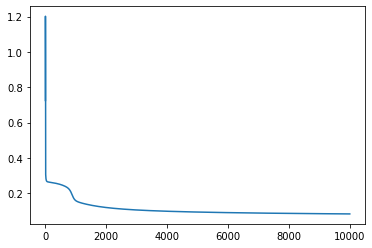

In [0]:
plt.plot(loss3)

Seems the loss has convergened to some kind of consistency at epoches round 5500 to 7500 and has turbulence in other range

Observe outcomes : seems the prediction is some kind of good

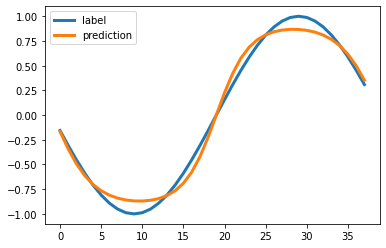

In [0]:
plt.plot(y3, linewidth=3)
plt.plot(NN3.predict(x3), linewidth=3)
plt.legend(['label', 'prediction'])

##### 1.7.4: Gussain Regression

Set up the gussain data with mu is 0 and sigma is 1 which means it is a standard norm distribution

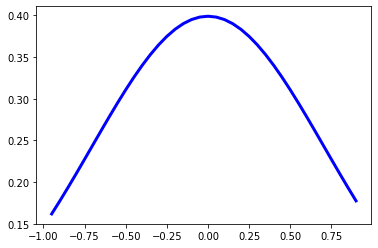

In [0]:
x4 = np.arange(-0.95,0.95,0.05).reshape(-1,1)

def gaussion(x,sigma=1,mu=0):
  a=1/(sigma*np.sqrt(2*np.pi))
  b=((x-mu)/sigma)**2
  return a*np.exp(-b).reshape(-1,1)

y4 = gaussion (x4)
plt.plot(x4, y4, color='blue', lw=3)

In [0]:
hidden_nodes = 4
learning_rate = 0.01
NN4 = NeuralNetwork(x4, y4, hidden_nodes, learning_rate)

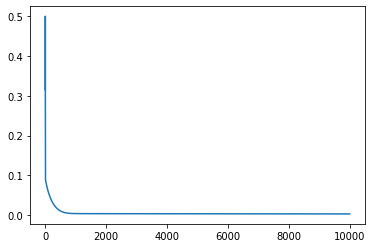

In [0]:
loss4 = []
epochs = 10000

#tqdm generates a progress bar
for i in tqdm(range(epochs)):
  loss4.append(NN4.evaluate(NN4.y, NN4.ypred))
  # if i<100:
  #   print('epoch {} , losss {}'.format(i,loss[i]))
  NN4.train(x4, y4)

plt.plot(loss4)

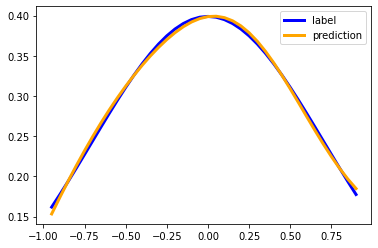

In [0]:
plt.plot(x4, y4, color='blue', lw=3)
plt.plot(x4, NN4.predict(x4),color='orange',linewidth=3)
plt.legend(['label', 'prediction'])

#### 1.8 Regrerssion: Notes

Using the steps illustrated for Problem 2 (except observing outcomes) test the ability of your neural network to perform regression task. What are your observations. How are some of the ways that the model can be improved?

###### 1.8.1 Comments

It seems already get a good prediction of the regression tasks for sin and gussain, but there some considerations:
+  the range of the input value is betweem 0 and 1, if use x not in the range, the prediction is not correct, this can also due to the activation functions we used 
+ in the test use 10000 epoches and i also tried 80000 epoches, actually you need to consider this. if we train with more epoches , can we get a significant improvent? i think train the models will cost GPU performance and sometimes we need to balance the accuracy and run time

Then can think of the improvement:

+ in the forward functon , actually  already calculate the derivatives of the activation function, we know that in the backprop function we need to use those derivatives again, so we can store them into an array in the local memory in order to avoid calculating them twice

### Phase 2: Integrate additional functionalities to the Neural Network model

The base class implementation of Neural Network provided is elementary and there are several features that can be improved. Implement any 3 of the following possible improvements (You are welcome to try all 5)

1. Introduce regularization of model parameters (weights and bias)
2. Enable mini-batch/ sequential learning where the number of items in a batch can be customized.
3. Implement one more hidden layer
4. Introduce ReLU activation. Implement Cross Entropy loss function.
5. Enable one or more of the following: Learning rate decay, early-stopping, Custom weights and bias initializer (eg. zeros, ones, Gaussian, etc)

HINTS:

* For 1, a regularization parameter will be required which can be set under __init__
* For 2, Batch learning can be introduced while training the model using a nested for loop approach. This does not require modification of the original class
* For 3, you will have to backpropagate loss through one more layer, which is like a chain operation
* For 4 and 5, you need to implement both the actual function (for feed-forward) and its derivate (for backpropagation)





#### Text description for Phase 2

**My comment**: here I choose 2, 4, 5 
1. for point 2 as hint i will use it while trainnig so no need to change the basic class
1. for point 5 I choose the last one: custome weights and bias initializer



Why I choose those 3 points for optimization

*   point 2: if the data is too much and  train the data one by one, then it will be a waste of time and the final result maybe not good, so use batches meaning everytime  just train a single batch and then we can make the loss convergence much more quickly
*   point 4: if use sigmoid function, as the maximum of the derivative of sigmoid is 0.25, so with the backprop progresswill mutiply the derivative which make the delta becoming more and more smaller , it will cause the gradient disappears, when use relu, when the value is bigger than 0 then the derivative will always be 1 so it will not cause gradient disappear

*  point 5: in the first basic class just set the initial weight to np.random value, as  the x input and final y should meet some kind of rules, we can set it to a common distribution which maybe better than nothing to follow at the very beginning 




In [0]:
#Introduce ReLU activation
def relu(t):
    return np.maximum(t, 0)

#Derivative of relu
def relu_derivative(p):
    p[p<=0] = 0
    p[p>0] = 1
    return p

In [0]:
# Loss function - Cross Entropy
def cross_entropy(y,X):
    X = X.clip(min=1e-8,max=1-1e-8)
    return -np.mean(y*np.log(X) + (1-y) * np.log(1-X))

# Loss function derivative - Cross Entropy
def cross_entropy_derivative(y,X):
    return  -(y-X) * 1/X * 1/(1-X)

In [0]:
# Phase2 Class definition
class NeuralNetwork_P2:
    def __init__(self, x, y, hidden_nodes, learning_rate):
        self.x = x
        self.y = y
        self.ypred = np.zeros(y.shape)

        self.hidden_nodes = hidden_nodes
        self.lr = learning_rate

        #here we use randn to custom the weight from very beginning
        #self.weights1 = np.random.randn(self.x.shape[1], self.hidden_nodes)
        self.weights2 = np.random.randn(self.hidden_nodes, 1)
        self.weights1 = np.random.randn(self.x.shape[1], self.hidden_nodes) #* np.sqrt(2/self.x.shape[1])
        #self.weights2 = np.random.randn(self.hidden_nodes, 1) * np.sqrt(2/self.hidden_nodes)
        #self.bias1 = np.random.randn(self.hidden_nodes)
        #self.bias2 = np.random.randn(1) 
        self.bias1 = np.random.rand(self.hidden_nodes)
        self.bias2 = np.random.rand(1)
        #print('self.weights1:{},shape is {}'.format(self.weights1,self.weights1.shape))
        #print('self.weights2:{},shape is {}'.format(self.weights2,self.weights1.shape))
        #print('self.bias1:{},shape is {}'.format(self.bias1,self.bias1.shape))
        #print('self.bias2:{},shape is {}'.format(self.bias2,self.bias2.shape))

    def feedforward(self):
        self.layer1 = relu(np.dot(self.x, self.weights1) + self.bias1)
        #print('self.layer1:{},shape is {}'.format(self.layer1,self.layer1.shape))
        self.layer2 = sigmoid(np.dot(self.layer1, self.weights2) + self.bias2)
        #print('self.layer2:{},shape is {}'.format(self.layer2,self.layer2.shape))
        return self.layer2
        
    def backprop(self):
        #print(self.ypred)
        #d_loss = cross_entropy_derivative(self.ypred, self.y)
        #print("d_loss is {},shape is {}".format(d_loss,d_loss.shape))
        #print("relu_derivative is {}".format(relu_derivative(self.ypred)))
        #delta = d_loss * sigmoid_derivative(self.ypred)  # (16,1)m(16,1)=(16,1)
        delta = cross_entropy_derivative(self.y, self.ypred)
        #print("delta is {},shape is {}".format(delta,delta.shape))
        gradient2 = delta * sigmoid_derivative(self.layer2)
        d_weights2 = np.dot(self.layer1.T, gradient2)  # (3,16)d(16,1)=(3,1)
        #print("d_weights2 is {},shape is {}".format(d_weights2,d_weights2.shape))
        #print(np.ones(1,self.x.shape[0]).shape)
        #print(delta.shape)
        d_bias2 = np.dot(np.ones((self.layer1.shape[0], 1)).T, gradient2) # (1,16)d16,1)=(1,1)=>(1,)
        #print("d_bias2 is {}".format(d_bias2))

        delta1 = np.dot(gradient2, self.weights2.T) #(1,3)m(16,3)m(16,1)=(16,3)
        gradient1 = delta1 * relu_derivative(self.layer1)
        d_weights1 = np.dot(self.x.T, gradient1)  #(2,16)d(16,3)=(2,3)
        #print("d_weights1 is {},shape is {}".format(d_weights1,d_weights1.shape))
        d_bias1 = np.dot(np.ones((self.x.shape[0], 1)).T, gradient1)  #(1,16)d(16,3)=(1,3)=>(3,)
        #print("d_bias1 is {}".format(d_bias1))

        # update parameters
        self.weights1 = self.weights1 - (d_weights1 * self.lr) 
        self.weights2 = self.weights2 - (d_weights2 * self.lr) 

        self.bias1 = self.bias1 -  (d_bias1 * self.lr) 
        self.bias2 = self.bias2 - (d_bias2 * self.lr) 

    def train(self, x, y):
        self.x = x
        self.y = y
        #random.shuffle(self.x) #shuffle the minibatch
        self.ypred = self.feedforward()
        #print('self.ypred is {}'.format(self.ypred))
        self.backprop()
    
    def predict(self, x):
        self.x = x
        self.ypred = self.feedforward()
        return self.ypred

    def evaluate(self, y, ypred):
        self.y = y
        self.ypred = ypred
        #print('ypred is {}'.format(ypred))
        #print('y is {}'.format(y))
        self.loss = cross_entropy(self.y,self.ypred)
        return self.loss

In [0]:
x_p2 = np.array(([0, 0], [0, 1], [1, 0], [1, 1]), dtype=float)
y_p2 = np.array(([0], [1], [1], [0]), dtype=float)

loss_p2 = []

epochs = 10000
hidden_nodes = 8 
learning_rate = 0.01
NN_P2 = NeuralNetwork_P2(x_p2, y_p2, hidden_nodes, learning_rate)

NN_P2.train(x_p2, y_p2)

for i in tqdm(range(epochs)):  
    loss_p2.append(NN_P2.evaluate(NN_P2.y, NN_P2.ypred))
    NN_P2.train(x_p2, y_p2)
    # if i%2 == 0:
    #   print('epoch {} : loss {}'.format(i,loss_p2[i]))

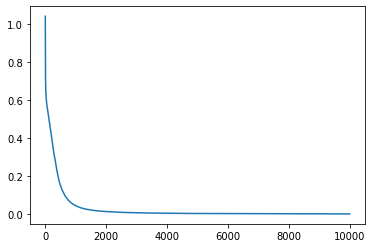

In [0]:
plt.plot(loss_p2)

+ Seems there is some problem as the loss has no change at all, so need to look back to see if issue in the backprop process
+ After check, the base class should be correct , use relu as the activation function in the first layer and the use softmax and cross entropy loss
+ seems still have some problem in the definition of derivatives function of cross entropy loss which makes the final result incorrect

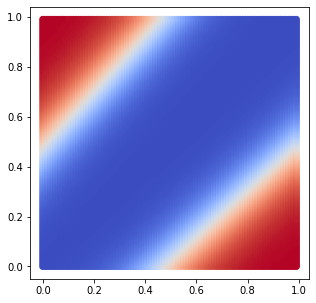

In [0]:
outcome = []
for i in np.arange(0,1,0.01):
  for j in np.arange(0,1,0.01):
    p = NN_P2.predict(x=[i, j])
    outcome.append([i, j, p[0]])

outcome = np.array(outcome)

f = plt.figure(figsize=(5,5))
plt.scatter(outcome[:,0], outcome[:,1], c=outcome[:,2], cmap="coolwarm")

### Phase 2: Notes

* All changes to the model can be tested using any one of the datasets used for classification test *(Problem 1)*, regression test *(Problem 2)*, or breast cancer dataset *(Problem 4)*
* Any code snippet that is modified should be written separately in code cells above.
* All modification and their impact on model performance must be described in detail in text cells below. Feel free to add images, mathematical equations, flowcharts, comparison scores, etc.
* Add as many number of text or code cells as required
* Note that sometimes it is easy to copy the outcomes from a previous cell execution in the form of an image (example, right click -> save image or screenshot), and embed the image in a text cell to describe the outcome.



### Phase 3: Classify cancerous cells using Wisconsin Breast Cancer Dataset

It is important to evaluate your Neural Network implementation on real-life dataset in order to measure performance, and identify scope for improvements. In this problem you will test the best variant of your model on the breast cancer dataset. More information about the data can be found [here](http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29).



#### 3.1 Load Data

Please note that the data loaded may not be normalized. Implement a data noramalization function and process the data through the normalizer before using it for training.

The dataset consists of 569 samples and 30 features. There are two classes identifying the cancer as bening or malign.

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.manifold import TSNE

In [0]:
# DO NOT MODIFY this cell

data = load_breast_cancer().data
target = load_breast_cancer().target

test_idx = np.array([  9,  10,  12,  15,  16,  20,  22,  25,  38,  47,  57,  61,  68,
        73,  74,  84,  85,  91,  93, 108, 112, 117, 119, 135, 136, 138,
       140, 147, 149, 152, 171, 172, 173, 180, 182, 186, 187, 205, 207,
       210, 218, 235, 239, 242, 251, 267, 270, 275, 283, 285, 286, 288,
       291, 305, 307, 310, 315, 318, 319, 323, 337, 339, 346, 350, 352,
       368, 370, 374, 378, 389, 402, 408, 414, 415, 419, 422, 428, 430,
       433, 435, 442, 451, 458, 459, 464, 465, 469, 470, 480, 484, 486,
       501, 510, 532, 533, 536, 537, 543, 553, 560])

train_idx = list(set(test_idx)^set(np.arange(len(data))))

data_train = data[train_idx]
target_train = target[train_idx]

data_test = data[test_idx]
target_test= target[test_idx]

train_max = data_train.max(axis=0)
train_min = data_train.min(axis=0)

In [0]:
# Implement code for data normalization. Remember you need to use normalization 
# parameters from training data and apply the same for test data. Eg. maximum 
# and minimum values.

# def normalize(data, tr_min, tr_max):
#     return (data - tr_min)/(tr_max-tr_min) 

# data_train_scaled = normalize(data_train,np.min(data_train),np.max(data_train))
# data_test_scaled = normalize(data_test,np.min(data_test),np.max(data_test))
# print(data_train_scaled.shape)
# print(data_test_scaled.shape)

In [0]:
def normalize(data, tr_min, tr_max):
    x_standard = (data - tr_min) /  (tr_max- tr_min)
    x_scaled = (x_standard * (1 - (-1))) + (-1)
    return x_scaled


data_train_scaled = normalize(data_train, train_min, train_max)
data_test_scaled = normalize(data_test, train_min, train_max)

#### 3.2 Training and Prediction

In [0]:
# train model
x = data_train_scaled
y = target_train.reshape(-1, 1)

hidden_nodes = 16
learning_rate = 0.001
NN_p3 = NeuralNetwork_P2(x, y, hidden_nodes, learning_rate)

In [0]:
# perform training. Consider modifying the previous training example for mini-batch or sequential training
# loss = []

# for i in tqdm(range(1000)): # trains the NN 1,000 times
batch_size = 10
epoches = 5000
loss_p3 = []
x_batch = np.asarray(np.array_split(x, batch_size))
y_batch = np.asarray(np.array_split(y, batch_size))


for i in tqdm(range(epoches)):
  loss_mean = 0
  for k in range(batch_size):
      NN_p3.train(x_batch[k], y_batch[k])
      loss_mean = loss_mean + NN_p3.evaluate(y_batch[k], NN_p3.ypred)
  loss_p3.append(np.divide(loss_mean, batch_size))

In [0]:
NN_p3.ypred[-1]

array([1.])

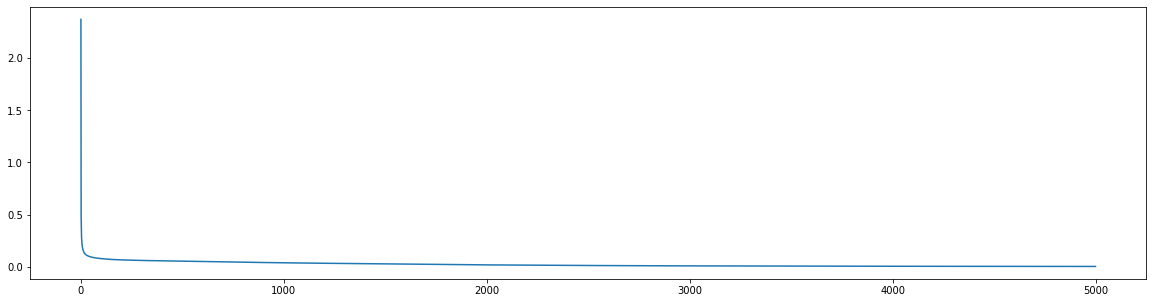

In [0]:
plt.figure(figsize=(20,5))
plt.plot(loss_p3)

#### 3.3 Results and Visualization

In [0]:
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report, confusion_matrix

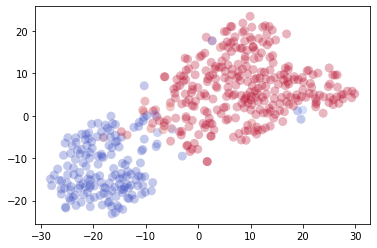

In [0]:
# Do not modify this cell
y_pred = NN_p3.predict(data_train_scaled)
y_pred_class = np.where(y_pred>=0.5, 1, 0)

X_embedded = TSNE(n_components=2).fit_transform(data_train_scaled)
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y_pred, cmap="coolwarm", alpha=0.3, linewidth=0, s=80)

**My comments**
+ As  use the correct MinMaxscale so it is clear for the model to distinguish the labels and est how the accurate.

In [0]:
y_pred = NN_p3.predict(data_test_scaled)
y_pred_class = np.where(y_pred>=0.5, 1, 0)
print(classification_report(target_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        45
           1       0.95      0.95      0.95        55

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



**My comments**

+  The accuracy is 0.94 .
Got the same % accuracy after run more than 5 times.


+ In most cases, the recall and precision is corelated to each other, if we want to get a higher recall rate, we need to expand our search area which will of course make the accuracy lower





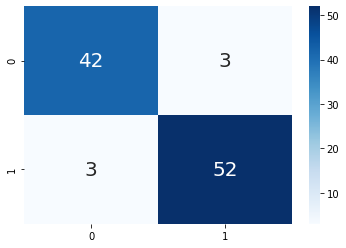

In [0]:
sns.heatmap(confusion_matrix(target_test, y_pred_class), annot=True, annot_kws={"size": 20}, cmap='Blues')

### Phase 3: Notes

Ensure that only training data is used for training the model and present your scores and results for the testing data.



### Evaluation

The scores for each problem is allocated as follows:

* P1: Completion of NN base class implementation - 3
* P1: Description of Backpropagation algorithm - 1
* P1: Successful run of Classification Tests (AND/XOR) - 3
* P1: Observations and Inferences (Reporting) - 2
* P1: Successful run of Regression Tests (Sine/Gaussian) - 3
* P1: Observations and Inferences (Reporting) - 2
* P2: Successful implementation of model improvement method:
    * 3 methods - 9
    * 5 methods - 9 + 1 bonus
* P3: Successful implementation of Breast Cancer Dataset - 3
* P3: Observations and Inferences (Reporting) - 2
* P3: Accuracy for Breast Cancer test data:
    * Accuracy < 90% (or not obtained) - 0
    * Accuracy >=90%, < 95% - 1
    * Accuracy >=95%, < 98% - 2
    * Accuracy >=98% - 2 + 1 bonus

The final score will be clipped to a maximum of 30




If you notice bugs in the above code or have suggestions to improve the content please contact Sivam Pillai (s.pillai@u.nus.edu)

---

END OF THE NOTEBOOK. WISH YOU ALL THE BEST

---